This notebook plots the data thats generated in 2BC

In [1]:
import seaborn as sns
import pandas as pd
from os.path import exists
import glob
from statannot import add_stat_annotation
import os 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab

#from mycolorpy import colorlist as mcp

from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

import scipy as scipy
from scipy import optimize

from soursop.sstrajectory import SSTrajectory
import mdtraj as md

import csv

# define this so we can read in nucleotides
NA_EXTENSION = ['D5P', 'DPC',  'DPU',  'DPT',  'DPA',  'DPG',  'R5P',  'RPC' , 'RPU',  'RPT',  'RPA',  'RPG']

# molecular weight of N protein (g/mol)
MW_N = 18850
M2nM=1e9

# importing mean()
from statistics import mean
  
def Average(lst):
    return mean(lst)

import numpy as np

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['legend.fontsize'] = 6

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'


Bad key "text.kerning_factor" on line 4 in
/home/alstonj/miniconda3/envs/labconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option('precision', 9)  # Setting the precision of decimal places for floating-point numbers

path = r'./Analysis/Data/'  # Defining the path to the data directory (change it to your desired path)
all_files = glob.glob(os.path.join(path, "*Ka.csv"))  # Finding all files in the specified path with a pattern

Total = []  # Creating an empty list to store data

df = pd.concat((pd.read_csv(f) for f in all_files), axis=1)  # Concatenating all CSV files into a single DataFrame

df = df.reindex(sorted(df.columns), axis=1)  # Sorting the columns of the DataFrame in alphabetical order

df_melted = pd.melt(df)  # Melting the DataFrame to convert it from wide to long format

# Splitting the 'variable' column into three separate columns: 'NTD', 'Replicate', 'Measurement'
df_structured = df_melted.join(df_melted['variable'].str.split('_', 3, expand=True).rename(columns={0: 'NTD', 1: 'Replicate', 2: 'Measurement'}))

df_structured  # Returning the final structured DataFrame

df_structured[200:255]

,variable,value,NTD,Replicate,Measurement
200,RBD_4_Ka,0.000009826,RBD,4,Ka
201,RBD_4_Ka,0.000011616,RBD,4,Ka
202,RBD_4_Ka,0.000012145,RBD,4,Ka
203,RBD_4_Ka,0.000015984,RBD,4,Ka
204,RBD_4_Ka,0.000018290,RBD,4,Ka
205,RBD_4_Ka,0.000017434,RBD,4,Ka
206,RBD_4_Ka,0.000016967,RBD,4,Ka
207,RBD_4_Ka,0.000017054,RBD,4,Ka
208,RBD_4_Ka,0.000017366,RBD,4,Ka
209,RBD_4_Ka,0.000017277,RBD,4,Ka


In [3]:
pd.set_option('precision', 9)  # Setting the precision of decimal places for floating-point numbers

path = r'./Analysis/Data/'  # Defining the path to the data directory (change it to your desired path)
all_files = glob.glob(os.path.join(path, "*Ka.csv"))  # Finding all files in the specified path with a pattern

Total = []  # Creating an empty list to store data

df = pd.concat((pd.read_csv(f) for f in all_files), axis=1)  # Concatenating all CSV files into a single DataFrame

df = df.reindex(sorted(df.columns), axis=1)  # Sorting the columns of the DataFrame in alphabetical order

df_melted = pd.melt(df)  # Melting the DataFrame to convert it from wide to long format

# Splitting the 'variable' column into three separate columns: 'NTD', 'Replicate', 'Measurement'
df_structured = df_melted.join(df_melted['variable'].str.split('_', 3, expand=True).rename(columns={0: 'NTD', 1: 'Replicate', 2: 'Measurement'}))

# Generating a new column 'Ka*' which is the 'value' column divided by the mean of values where NTD is equal to 'SCO2'
df_structured['Ka*'] = df_structured['value'] / df_structured[df_structured['NTD'] == 'SCO2']['value'].mean()

df_structured  # Returning the final structured DataFrame

,variable,value,NTD,Replicate,Measurement,Ka*
0,GS10_1_Ka,0.000002594,GS10,1,Ka,0.010163567
1,GS10_1_Ka,0.000001944,GS10,1,Ka,0.007615829
2,GS10_1_Ka,0.000002150,GS10,1,Ka,0.008421995
3,GS10_1_Ka,0.000001921,GS10,1,Ka,0.007527222
4,GS10_1_Ka,0.000002059,GS10,1,Ka,0.008067466
...,...,...,...,...,...,...
295,SCO2_5_Ka,0.000327736,SCO2,5,Ka,1.284065584
296,SCO2_5_Ka,0.000308462,SCO2,5,Ka,1.208550461
297,SCO2_5_Ka,0.000287011,SCO2,5,Ka,1.124506529
298,SCO2_5_Ka,0.000273092,SCO2,5,Ka,1.069973266


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RBD v.s. GS10: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.056e-10 U_stat=4.595e+03
GS10 v.s. GS25: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.537e+03
RBD v.s. GS25: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.963e-12 U_stat=4.744e+03
SCO2 v.s. GS10: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.063e-25 U_stat=5.625e+03
SCO2 v.s. GS25: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.063e-25 U_stat=5.625e+03


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2657584e0>,
  <statannot.StatResult.StatResult at 0x7fd2656000b8>])

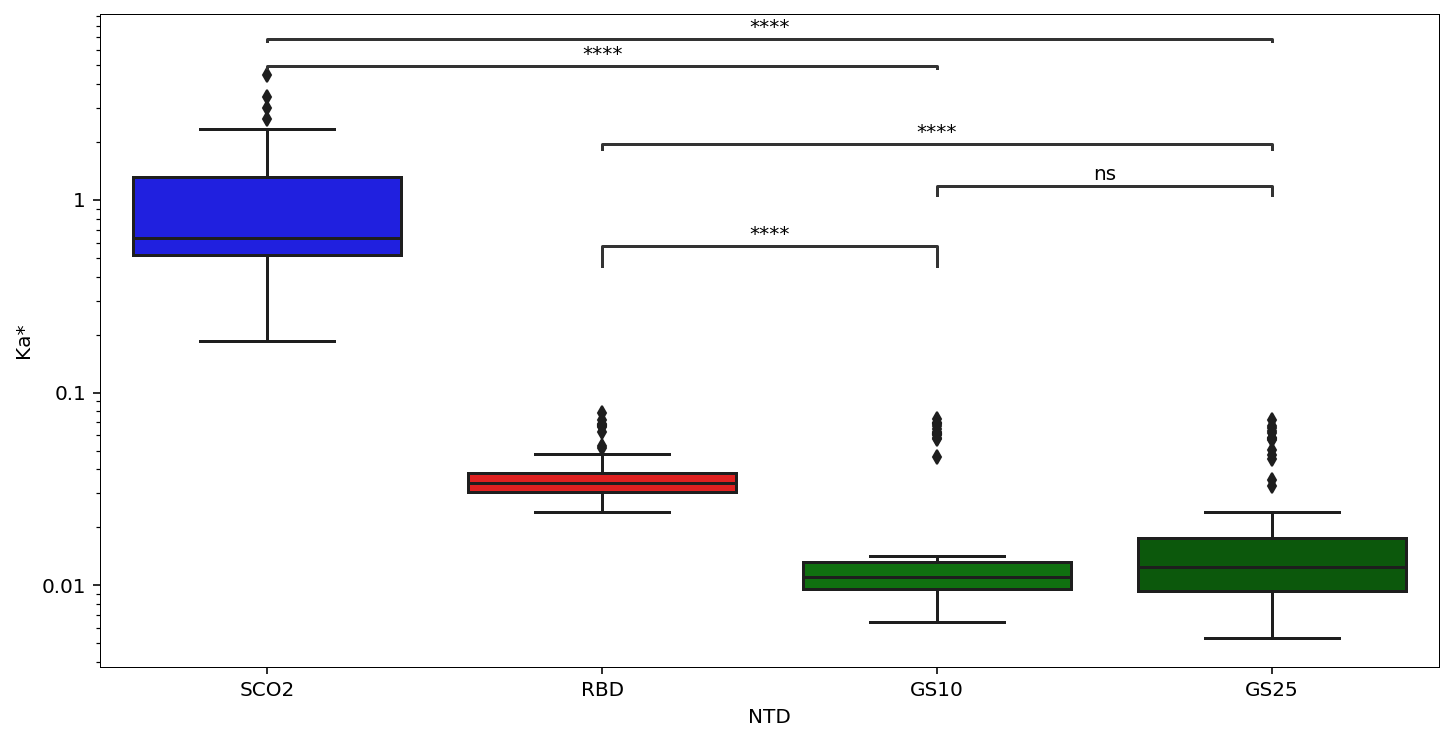

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_yscale('log')

# Updating the y-axis tick labels to display 1, 0.1, and 0.01
ax.set_yticks([1, 0.1, 0.01])
ax.set_yticklabels(['1', '0.1', '0.01'])

df = df_structured
x = "NTD"
y = "Ka*"

# Specifying the order of the x-axis categories
order = ['SCO2','RBD','GS10', 'GS25']

# Specify the color palette
palette = {'GS10': 'green', 'GS25': 'darkgreen', 'SCO2': 'blue', 'RBD': 'red'}

ax = sns.boxplot(data=df, x=x, y=y, order=order, zorder=2, palette=palette)

# Adding statistical annotations to the boxplot
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("GS10", "RBD"), ("GS25", "RBD"),("GS10", "GS25"), ("GS10", "SCO2"), ("GS25", "SCO2")],
                                   test='Mann-Whitney', text_format='star',
                                   verbose=2)

fig.savefig(f'Analysis/Plots/GS_box_plot.png', format='png')
fig.savefig(f'Analysis/Plots/GS_box_plot.pdf', format='pdf')

test_results

No handles with labels found to put in legend.


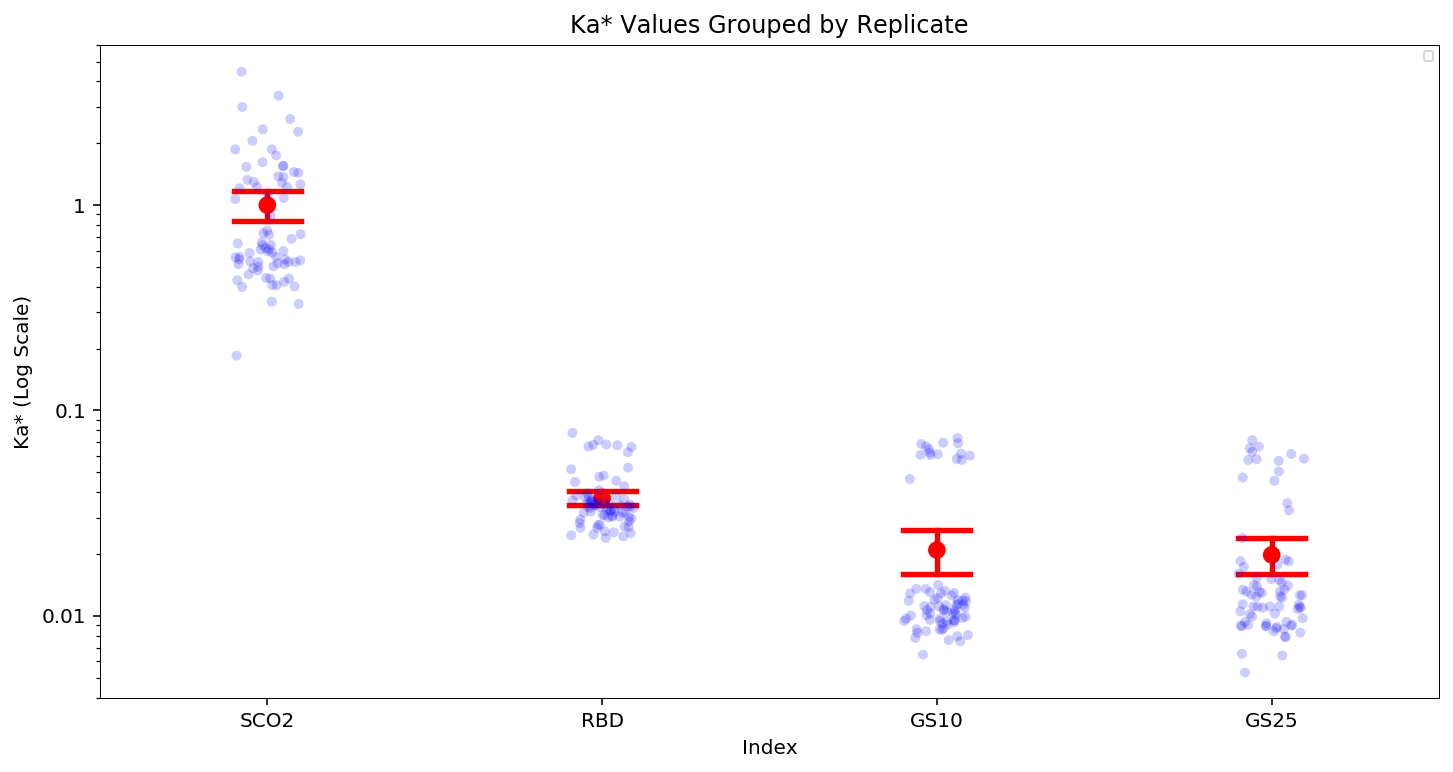

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_yscale('log')

# Updating the y-axis tick labels to display 1, 0.1, and 0.01
ax.set_yticks([1, 0.1, 0.01])
ax.set_yticklabels(['1', '0.1', '0.01'])

# Specifying the order of the x-axis categories
order = ['SCO2','RBD','GS10', 'GS25']

# Group by 'Replicate' and calculate the mean and SEM of the 'Ka*' column
grouped_data = df_structured.groupby('NTD')['Ka*'].agg(['mean', 'sem'])

# Create a strip plot using Seaborn
ax = sns.stripplot(data=df_structured, x='NTD', y='Ka*', color = 'blue', alpha = 0.2, order = order)

# Create a strip plot using Seaborn
ax = sns.pointplot(data=df_structured, x='NTD', y='Ka*', yerr=grouped_data['sem'], fmt='o', color='red',
             capsize=.2, join=False, order = order)

# Set y-axis scale to logarithmic
#plt.yscale('log')

plt.ylim(0.004,6)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Ka* (Log Scale)')
plt.title('Ka* Values Grouped by Replicate')

# Display legend
plt.legend()

fig.savefig(f'Analysis/Plots/GS_strip_plot.png', format='png')
fig.savefig(f'Analysis/Plots/GS_strip_plot.pdf', format='pdf')

# Show the plot
plt.show()


No handles with labels found to put in legend.


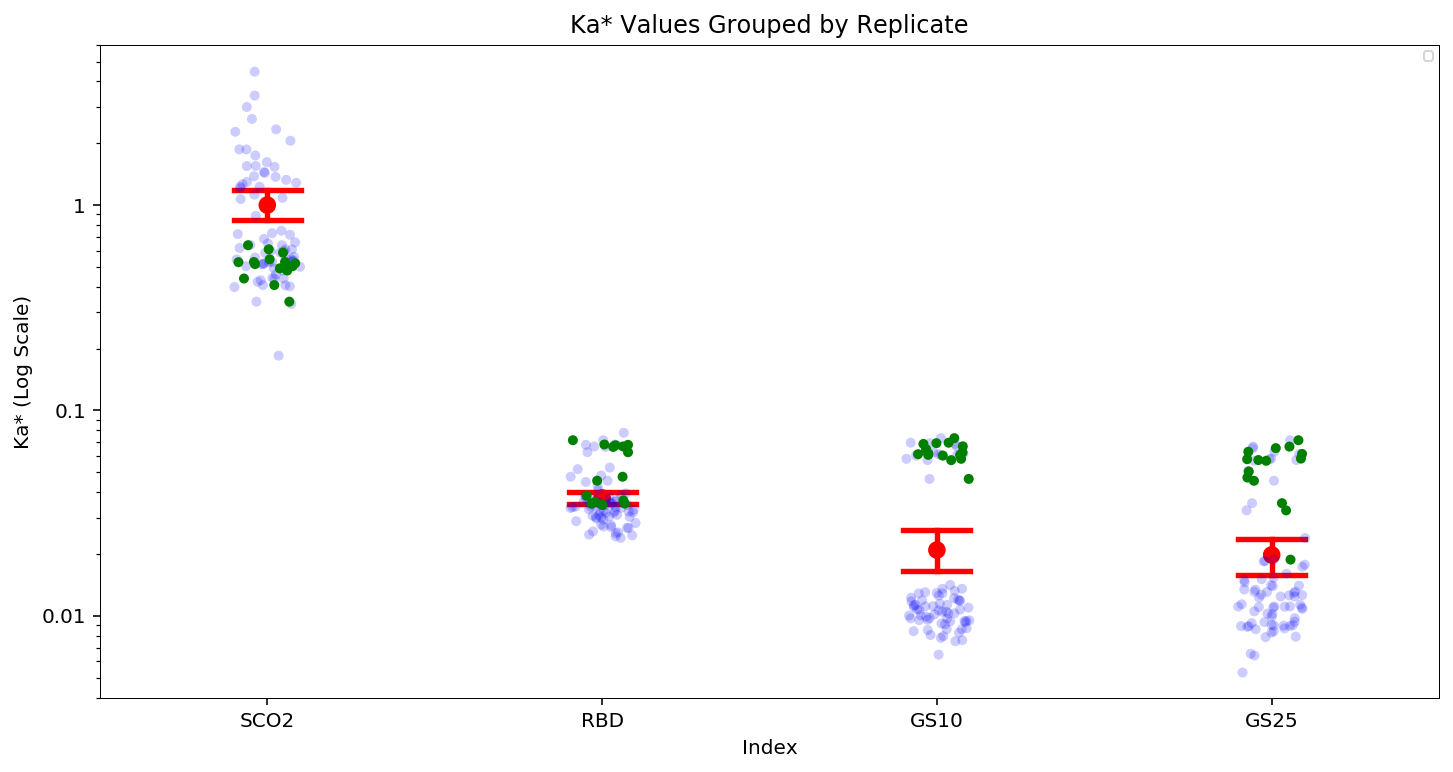

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_yscale('log')

# Updating the y-axis tick labels to display 1, 0.1, and 0.01
ax.set_yticks([1, 0.1, 0.01])
ax.set_yticklabels(['1', '0.1', '0.01'])

# Group by 'Replicate' and calculate the mean and SEM of the 'Ka*' column
grouped_data = df_structured.groupby('NTD')['Ka*'].agg(['mean', 'sem'])

# Create a strip plot using Seaborn
sns.stripplot(data=df_structured, x='NTD', y='Ka*', color = 'blue', alpha = 0.2, order = order)

# Filter the data for 'Replicate' column equal to 4
filtered_data = df_structured[df_structured['Replicate'] == '4']

# Create another strip plot using Seaborn for the filtered data with 'Replicate' column equal to 4
sns.stripplot(data=filtered_data, x='NTD', y='Ka*', color='green', order = order)

# Create a strip plot using Seaborn
sns.pointplot(data=df_structured, x='NTD', y='Ka*', yerr=grouped_data['sem'], fmt='o', color='red',
             capsize=.2, join=False, order = order)

# Set y-axis scale to logarithmic
#plt.yscale('log')

plt.ylim(0.004,6)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Ka* (Log Scale)')
plt.title('Ka* Values Grouped by Replicate')

# Display legend
plt.legend()

fig.savefig(f'Analysis/Plots/GS_strip_plot4.png', format='png')
fig.savefig(f'Analysis/Plots/GS_strip_plot4.pdf', format='pdf')

# Show the plot
plt.show()

In [7]:
# Group the data by 'NTD' and calculate mean and standard deviation
grouped = df_structured.groupby('NTD')['value'].agg(['mean', 'sem'])
print(grouped)

# Calculate the normalization term (mean and std when NTD is SCO2)
normalization_mean = grouped.loc['SCO2', 'mean']
normalization_sem = grouped.loc['SCO2', 'sem']

normalization_mean
normalization_sem

grouped['A'] = np.power(grouped['sem']/grouped['mean'],2)
grouped['B'] = np.power((df_structured[df_structured['NTD'] == 'SCO2']['value'].sem()/df_structured[df_structured['NTD'] == 'SCO2']['value'].mean()),2)


# Divide a column by the value corresponding to 'SCO2' in the 'mean' column
column_name = 'mean'  # Specify the column name you want to divide
division_column = grouped[column_name] / grouped.loc['SCO2', column_name]

grouped['Ratio'] = division_column

grouped['error'] = np.sqrt(grouped['A']+grouped['B']) * grouped['Ratio']

grouped


             mean          sem
NTD                           
GS10  0.000005339  0.000000628
GS25  0.000005057  0.000000528
RBD   0.000009562  0.000000367
SCO2  0.000255233  0.000022796


,mean,sem,A,B,Ratio,error
NTD,,,,,,
GS10,0.000005339,0.000000628,0.013855194,0.00797691,0.020919396,0.003090985
GS25,0.000005057,0.000000528,0.010897439,0.00797691,0.019814894,0.002722248
RBD,0.000009562,0.000000367,0.001476453,0.00797691,0.037465282,0.003642690
SCO2,0.000255233,0.000022796,0.007976910,0.00797691,1.000000000,0.126308436
